# APS106 Week 7 Design Problem

## Wordle - Problem Background

Your good friend just introduced you to Wordle, the New York Times word-guessing game that went viral during the pandemic. As a problem-solver, this game has captivated your attention, but alas the NY Times only gives you one word a day, limiting how much you can be playing this game.

You realize that with your recent knowledge of string manipulation you know enough to be dangerous and design your own (and maybe better!) Wordle game in Python. To design this game, you will be relying on your knowledge of strings and string methods, while and for loops, and escape characters for print formatting.

Make sure your code is efficient, well-thought-out, and accounts for all possibilities so can start to Wordle as soon as possible.

Here is a link to the original Wordle game online, play here: https://www.nytimes.com/games/wordle/index.html

If you wanted to read a bit about Wordle instead, plus an infographic: https://www.cnet.com/how-to/wordle-explained-what-you-need-to-know-about-the-viral-word-game/

<div>
    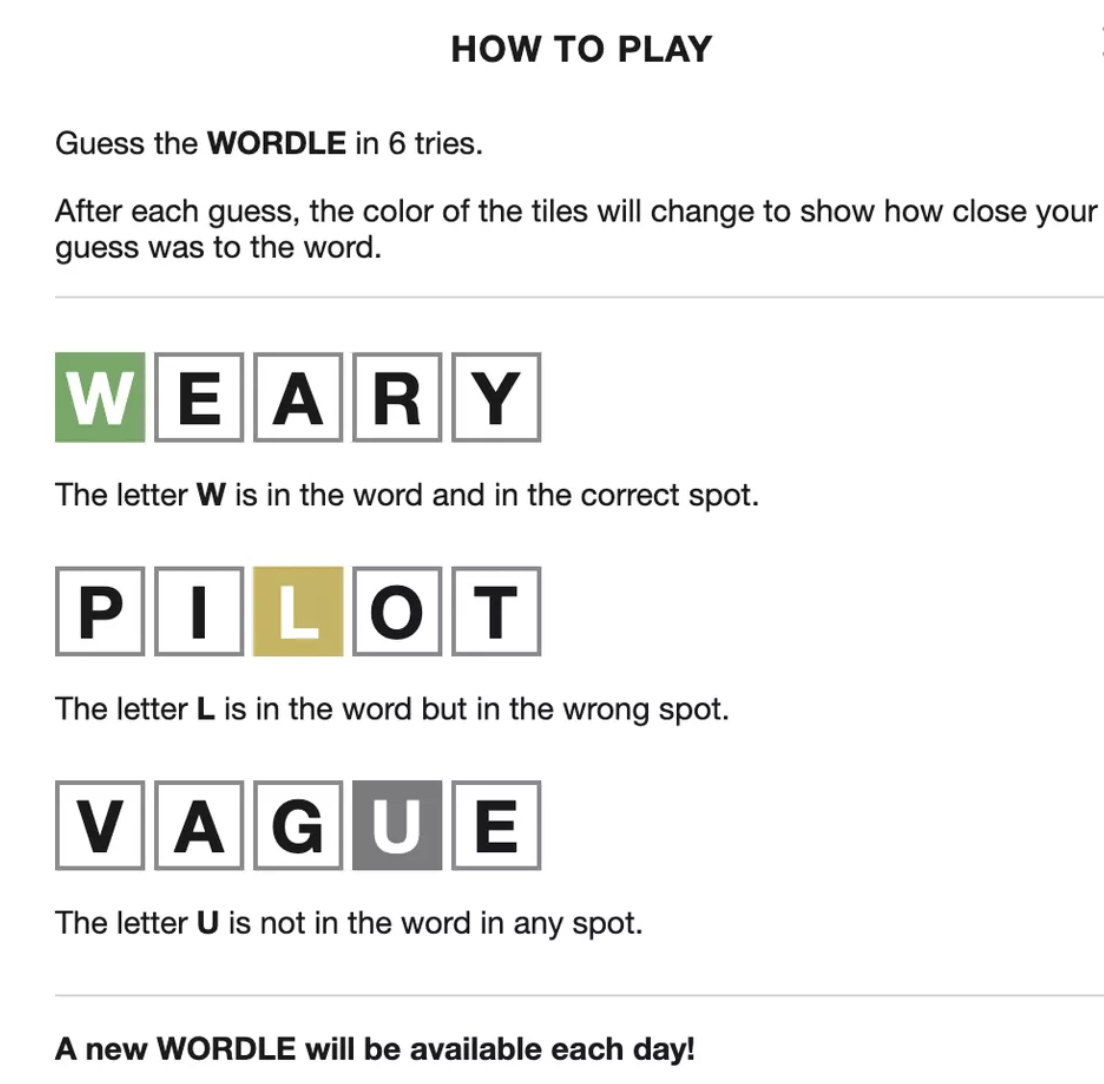
</div>

## Define the problem
This is a word guessing game relying on string inputs, where we have to have an acceptable (real, 5-letter) word which is the solution, have acceptable user guesses, allow the user up to 6 guesses, and indicate to the user the correctness of their guess by color coding the letters, based on if they are correct and in correct position (green), the correct letter in wrong position (yellow) or not in the word (grey). The final program will obey the game's rules and account for all possible scenarios to be as comprehensive as possible.

The difficult part of this programming exercise will be to define all the checks on the user input and indicating to the end user how close they are to the correct solution. Escape characters will be used to do the color coding part of the game, but you should still consider how to make your program respond once the user gets the correct guess (i.e. if you are using a loop to check the guess each time, how could you indicate when the game should stop?).

Let's discuss some test cases.

## Define Test Cases

Firstly, using the dictionaries make sure that user input for solution and any guesses are real words, with 5 letters. Make sure to account for incorrect user inputs, by asking for a new input (and checking that one as well).

Make sure that the user gets 6 attempts to guess the word.

What happens if the user gets the word right? Does the game end or does it continue to use their remaining attempts?

Are the correct letters being color coded, and in the correct positions?

Is your string of incorrect guesses containing the correct letters?

## Generate multiple solutions
Based on what we have learned so far, our program must:
1. Use input statements to get a solution and user guesses
2. Use loops to keep track of the # of attempts 
3. Use loops to check the guess string compared to the solution string and display this result
4. Have a string keeping track of all the incorrect letters (i.e. guessed letters not in solution).
5. Finish the game if either the user has no more attempts, or the correct word is guessed

An algorithmic plan would be:
1. Get a random solution from a list of valid words and a word selection from the user
2. Compare each letter of guess to the solution letters.
3. Indicate which letters are correct, which are incorrect in a clear print output to users.
4. Keep an internal score, to indicate if all 5 letters in a guess are correct.
5. Ensure attempts are tracked, as well as all incorrect letters in guesses (see final image at bottom of notebook).

What about a Programming Plan? How can we implement this efficiently and cleanly?
1. Get input from the users and store in two variables.
2. Compare inputs and compute the results. Track the number of guesses and determine way to indicate 100% match between guess and solution.
3. Display output!

## Select a Solution
As the single solution looks straight-forward (since the problem is pretty easy), we can select it and proceed.

### 1. Load a list of valid words
The file `valid-wordle-words.txt` contains a list of all acceptable words for the game. Le's open the file and store the words in a list.

In [1]:
# create an empty list that will be used to store the words
valid_words = []

# open the file for reading
with open('valid-wordle-words.txt',  'r') as file:
    # each line in the file contains a word
    # loop over the lines and add each word to the list
    for word in file:
        valid_words.append(word.strip()) # the strip method removes the newline '\n' character
        

In [2]:
print("The number of valid words is: ", len(valid_words))
print("The first 10 valid words are: ", valid_words[:10])

The number of valid words is:  12972
The first 10 valid words are:  ['aahed', 'aalii', 'aargh', 'aarti', 'abaca', 'abaci', 'aback', 'abacs', 'abaft', 'abaka']


### 2. Select a random word as the solution

Next, let's let's write a function called `get_solution` to select a random word from the list to use as a solution. We'll use the `randint` function from the `random` module to pick a word from a random index in the list.

the user for some input and lower the case of their input. After this, let's check the user's input to see if its valid and if not, let's give them some feedback and ask them to input their guess again.


In [20]:
import random

def get_solution(valid_words):
    """
    (list of strings) -> str
    Pick a random string from the list and return it
    """
    # use random to get a random index value
    rand_index = random.randint(0, len(valid_words)-1)
    
    return valid_words[rand_index]

In [21]:
# test example
solution = get_solution(valid_words)
print("The super secret solution is: ", solution)

The super secret solution is:  towns


## Get a guess from the user

Now that we have a list of acceptable words and a secret solution word, we want to get guesses from the user. We know that we can use the `input` function to get user input. However, the `input` function alone won't check whether the input is a valid 5 letter word, so we'll write a function called `get_guess` that:
1. prompts the user to enter a guess
2. checks if the word is valid
3. if the word is invalid, tell the user why it is invalid, and ask them to enter another word
4. if the word is valid, return the word

The `get_guess` function is written below. It calls an additional function `get_input_feedback` which checks if the entered guess string is valid.

### Breakout Session 1

The function `get_input_feedback` takes in a user's correct guess and prints one of the following messages if the guess is invalid:
- String longer than 5 character: `'Your word is too long!'`
- String shorter than 5 character: `'Your word is too short!'`
- String contains non-letter characters: `'Your word contains invalid characters!'`
- String is not a real word: `'This isn't a real word!'`

The function should return `True` if the guess is valid and `False` if the guess is invalid.

In [5]:
def get_input_feedback(guess, valid_words):
    """
    (str, list of str) -> bool
    Check the string and provide feedback to the user.
    Returns true if the guess is valid, false otherwise.
    """
    valid = True
    
    if len(guess) > 5:
        print('Your word is too long!')
        valid = False
    elif len(guess) < 5:
        print('Your word is too short!')
        valid = False
    elif not guess.isalpha():
        print('Your word contains invalid characters!')
        valid = False
    elif guess not in valid_words:
        print("This isn't a real word!")
        valid = False
        
    return valid
        
def get_guess(valid_words):
    """
    (list of strings) -> str
    
    Ask the user to guess a 5 letter word and check if its valid.
    The first valid entry is returned.
    """
    guess = input('Please enter a guess: ')
    guess = guess.lower() # convert the guess to lower-case

    while not get_input_feedback(guess, valid_words):
        guess = input('Give me a new guess: ')
        guess = guess.lower()
        
    return guess
    

#### Test 1: 

In [6]:
get_input_feedback('Joseph', valid_words)

Your word is too long!


False

#### Test 2

In [7]:
get_input_feedback('99!!!', valid_words)

Your word contains invalid characters!


False

## Put together the game

Now that we can get solutions and guesses, let's code up the actual game.

Below is an example of what the output from this game looks like. Let's walk through it step by step.
<br>
<img src="images/sample.png" alt="drawing" width="600"/>
<br>

### 1. Evaluate a guess

Let's start by writing code to evaluate a single guess. The function `check_guess` below evaluates a single guess. It returns three items:
1. A score for the guess. Each correct letter in the correct position is worth one point.
2. A string containing all incorrect letters within the guess.
3. A list of escape sequence codes defining green, yellow, or grey backgrounds used for printing the results.

The function uses a loop to evaluate each letter of the guess individually. Within the loop, the function `check_letter` is called to evaluate a letter at a specified index.

### Breakout session 2
The function `check_letter` has three parameters:
1. `guess` - a string representing the user's guess
2. `solution` - a string representing the solution
3. `index` - an int defining the character index to be evaluated

The function should return two values:
1. A score for the letter at the given index. 1 if the letter is correct, 0 otherwise.
2. A boolean indicating if the letter at the given index is contained anywhere within the solution.

In [8]:
def check_letter(guess, solution, index):
    """
    (str,str,int) -> int, bool
    
    Checks if the letter at a specified index is correct
    or if the letter is contained within the solution.
    
    The first return value is a 1 if the letter is correct, otherwise 0 is returned.
    The second return value is True if the letter at the specified index is within
    the solution, false otherwise.
    """
    if guess[index] == solution[index]:
        return 1, True
    elif guess[index] in solution:
        return 0, True
    else:
        return 0, False

def check_guess(guess, solution):
    """
    (str, str) -> int, str, list of escape sequences
    
    Evaluates a guess against a solution and returns the 
    score of the guess, the incorrect letters contained within
    the guess, and a list of escape sequences defining the 
    background colours to be printed behind the letters.
    """
    
    # define escape sequences for fancy printing
    green_background = "\x1b[42m"
    yellow_background = "\x1b[43m"
    grey_background = "\x1b[47m"
    
    # initalize score, incorrect letters, and print colours
    word_score = 0
    incorrect_letters = ""
    print_colours = []
    
    # loop through all indices of the guess
    for i in range(len(guess)):
        # evaluate the letter at the current index
        letter_score, in_solution = check_letter(guess, solution, i)
        
        # append the correct background colour for the index
        if letter_score == 1:
            print_colours.append(green_background)
        elif in_solution:
            print_colours.append(yellow_background)
        else:
            print_colours.append(grey_background)
            
            # update incorrect letters as needed
            if guess[i] not in incorrect_letters:
                incorrect_letters += guess[i]
        
        word_score += letter_score
        
    return word_score, incorrect_letters, print_colours

#### Example test case 1
solution: "throw"<br>
guess: "grown"<br>
index: 3

In [9]:
check_letter("grown", "throw", 3)

(0, True)

#### Example test case 2
solution: "crest"<br>
guess: "crane"<br>
index: 0

In [10]:
check_letter("crane", "crest", 0)

(1, True)

### 2. Complete the game

As a final step, we'll write code to control the gameplay. Note that we will use the function `print_guess` to help us with the fancy printing.

### Breakout session 3
Complete the code below to control the game.

In [11]:
from wordle import print_guess

# Get the user solution
solution = get_solution(valid_words)

# Initialize some variables
remaining_attempts = 6
incorrect_letters = ""
score = 0

while (remaining_attempts > 0 and score != 5):
    
    # get the user's next guess
    guess = get_guess(valid_words)
    
    # evaluate the guess
    score, attempt_incorrect_letters, print_colours = check_guess(guess, solution)
    
    # update incorrect letters
    for letter in attempt_incorrect_letters:
        if letter not in incorrect_letters:
            incorrect_letters += letter
    
    # update the number of remaining attempts
    remaining_attempts -= 1
    
    # print the guess
    print_guess(guess, print_colours, incorrect_letters)
    
    
if (score == 5):
    print("Well done! You got the word " + solution)
else:
    print("Better luck next time... the answer was: " + solution)

Please enter a guess: coded
c o d e d 	Incorrect Letters:  c d e 
Please enter a guess: wrong
w r o n g 	Incorrect Letters:  c d e g r w 
Please enter a guess: knows
k n o w s 	Incorrect Letters:  c d e g r s w 
Please enter a guess: plank
p l a n k 	Incorrect Letters:  a c d e g l r s w 
Please enter a guess: panko
p a n k o 	Incorrect Letters:  a c d e g l r s w 
Please enter a guess: pinko
p i n k o 	Incorrect Letters:  a c d e g l r s w 
Well done! You got the word pinko


## Let's Play!
We'll import a packaged version incase you were unable to get the game working during class.

In [ ]:
from wordle import play_wordle
play_wordle()